In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Exporting the data from CSV file 

df =  pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [28]:
# information about the features of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [29]:
# Description about the dataset (Mean, Standard deviation, Percentile values, etc)

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [30]:
# Find out whethere there are any null values or not ?

df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

#### EDA

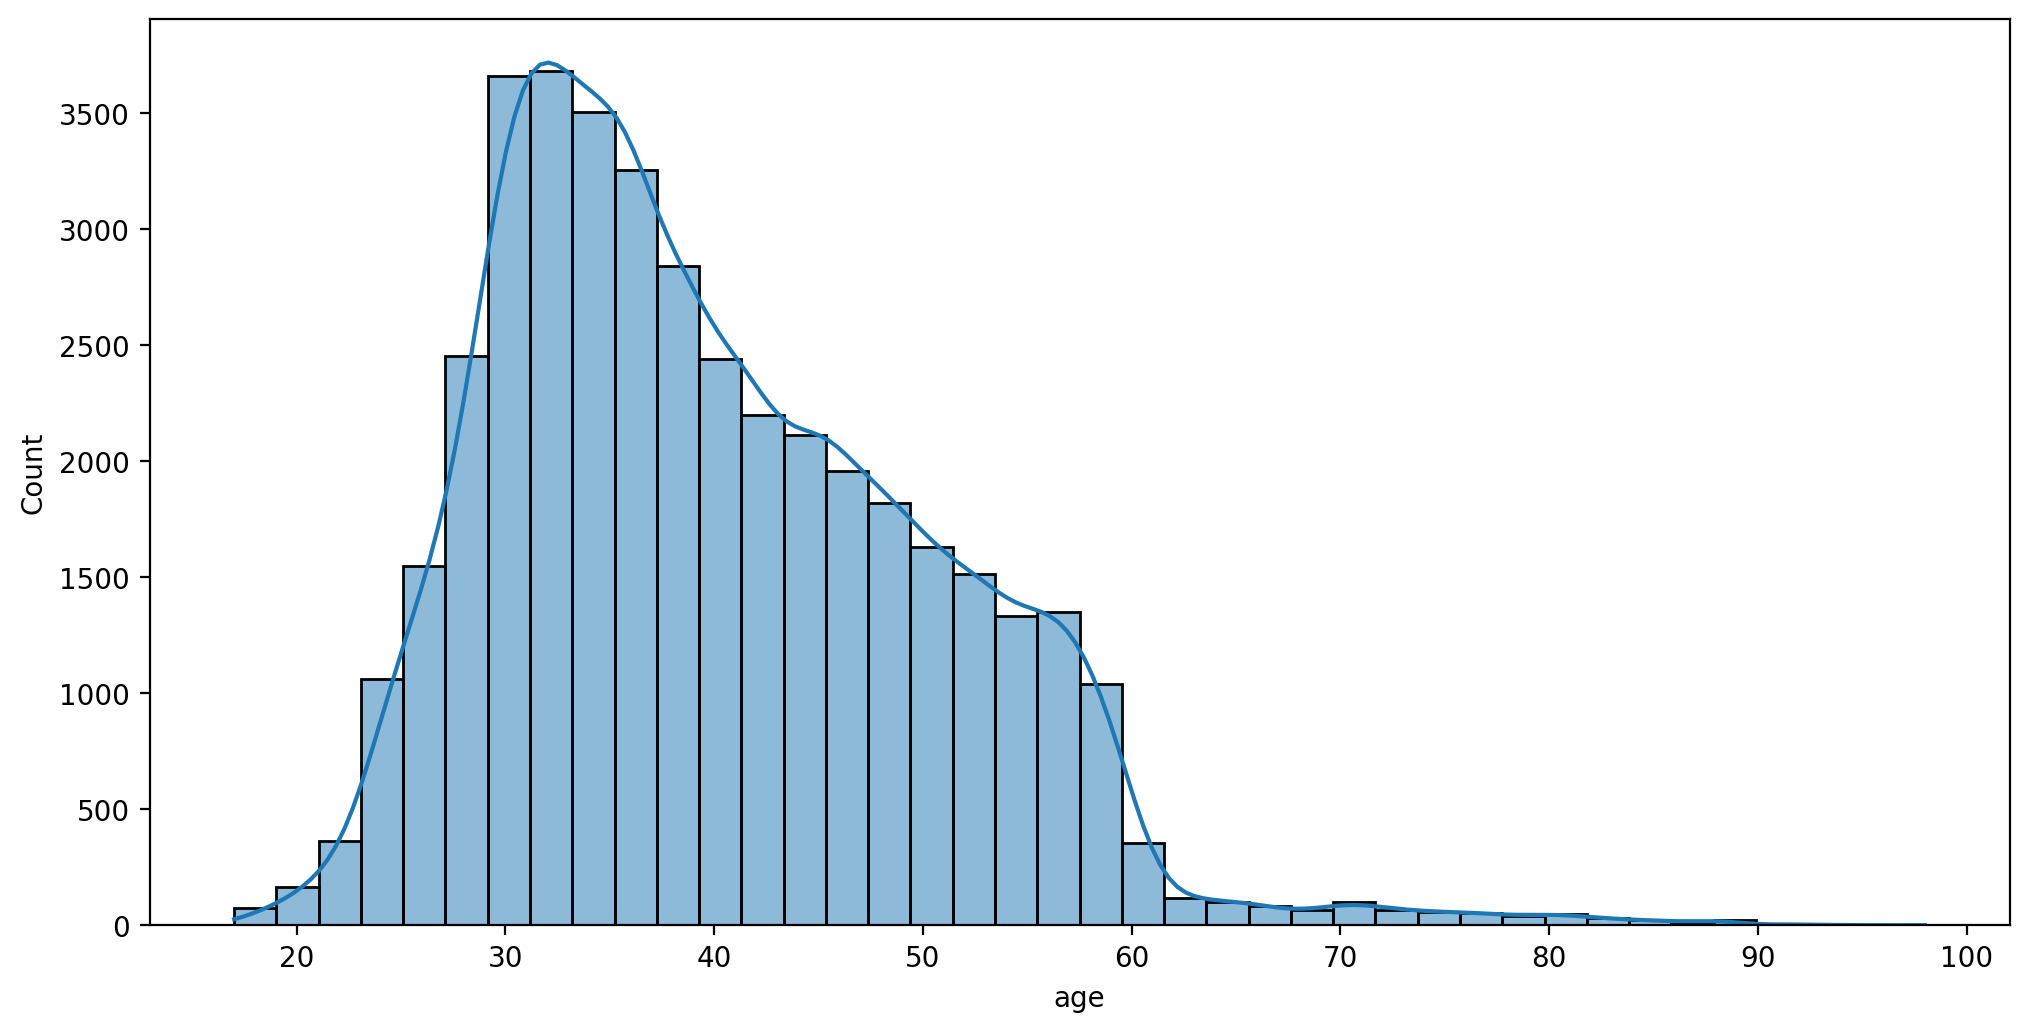

In [31]:
# Distribution of the Age data in the dataset

plt.figure(figsize=(12,6), dpi=200)
sns.histplot(x='age', data=df, bins=40, kde=True)

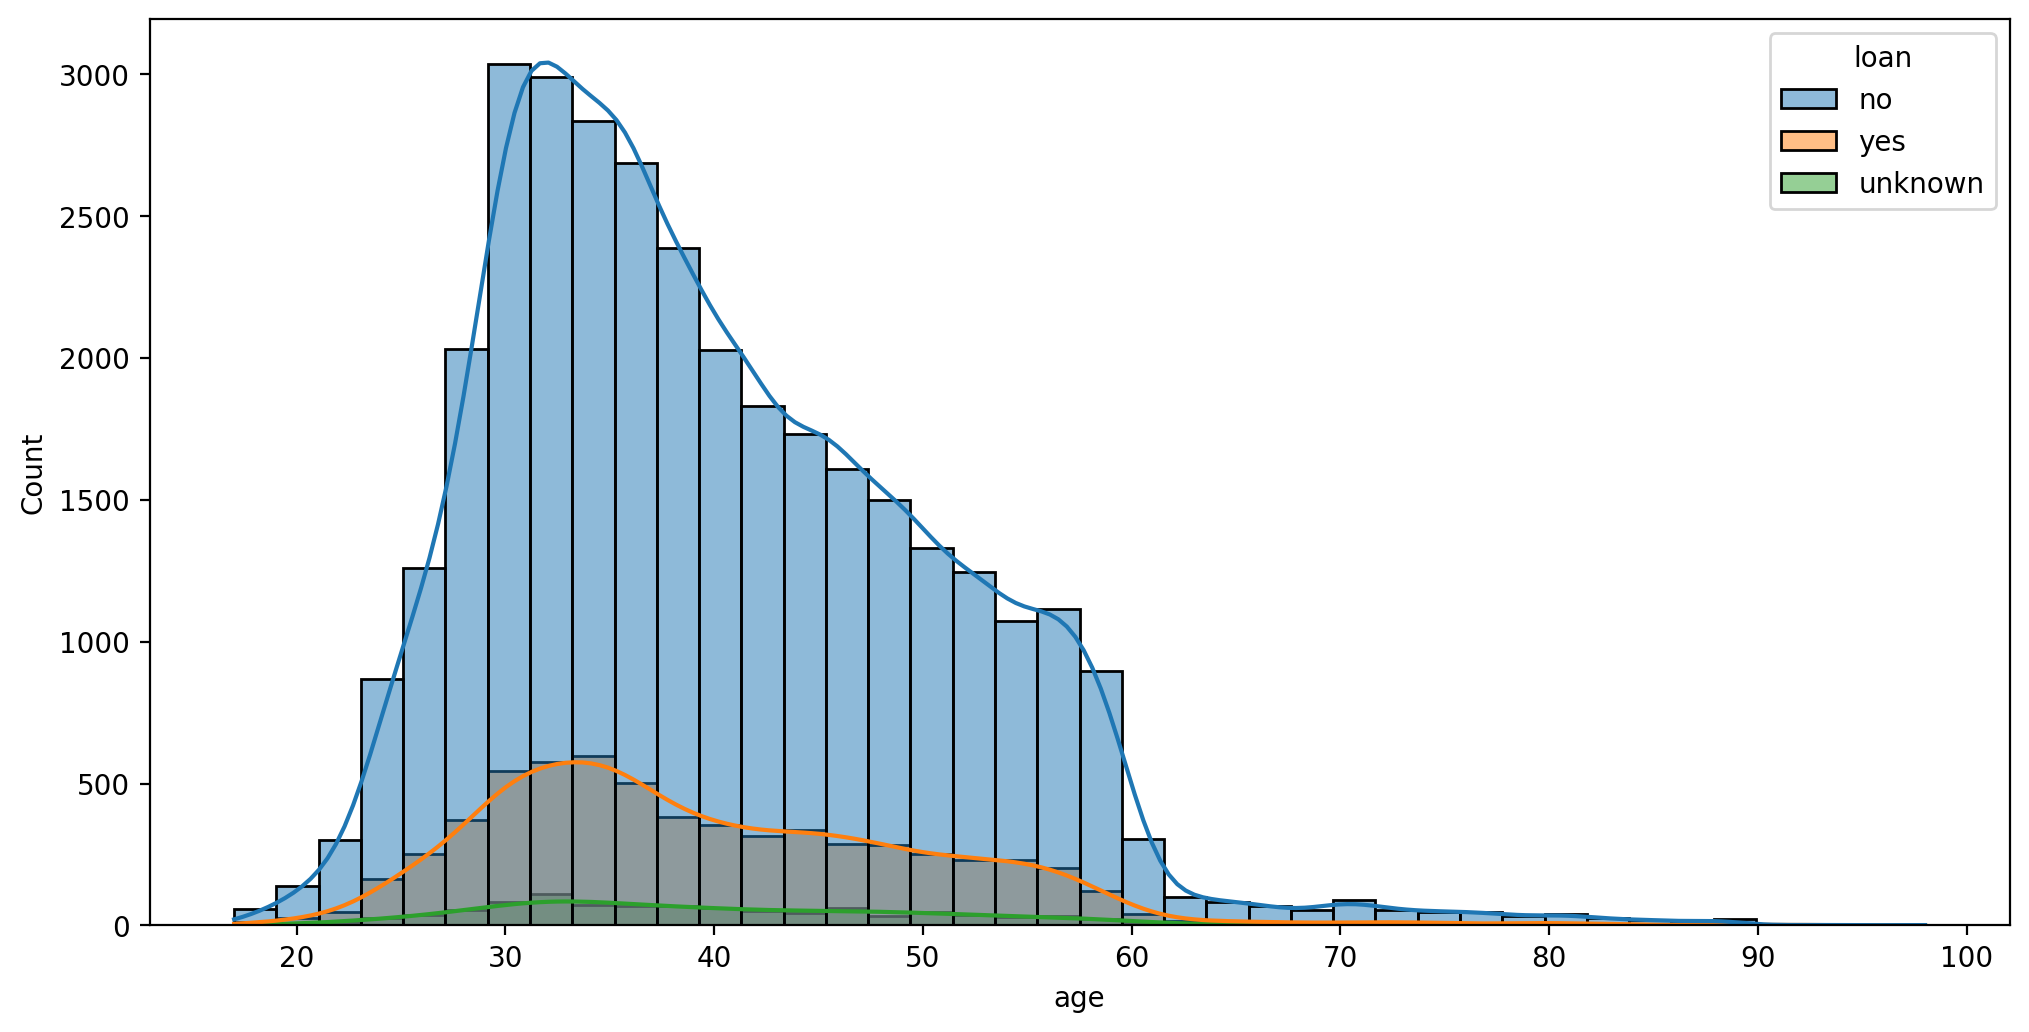

In [32]:
# relation between the age and loan in the dataset

plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='age', hue='loan', kde=True, bins=40)

From the above plot we can conclude that majority of the people doesn't have any loans.

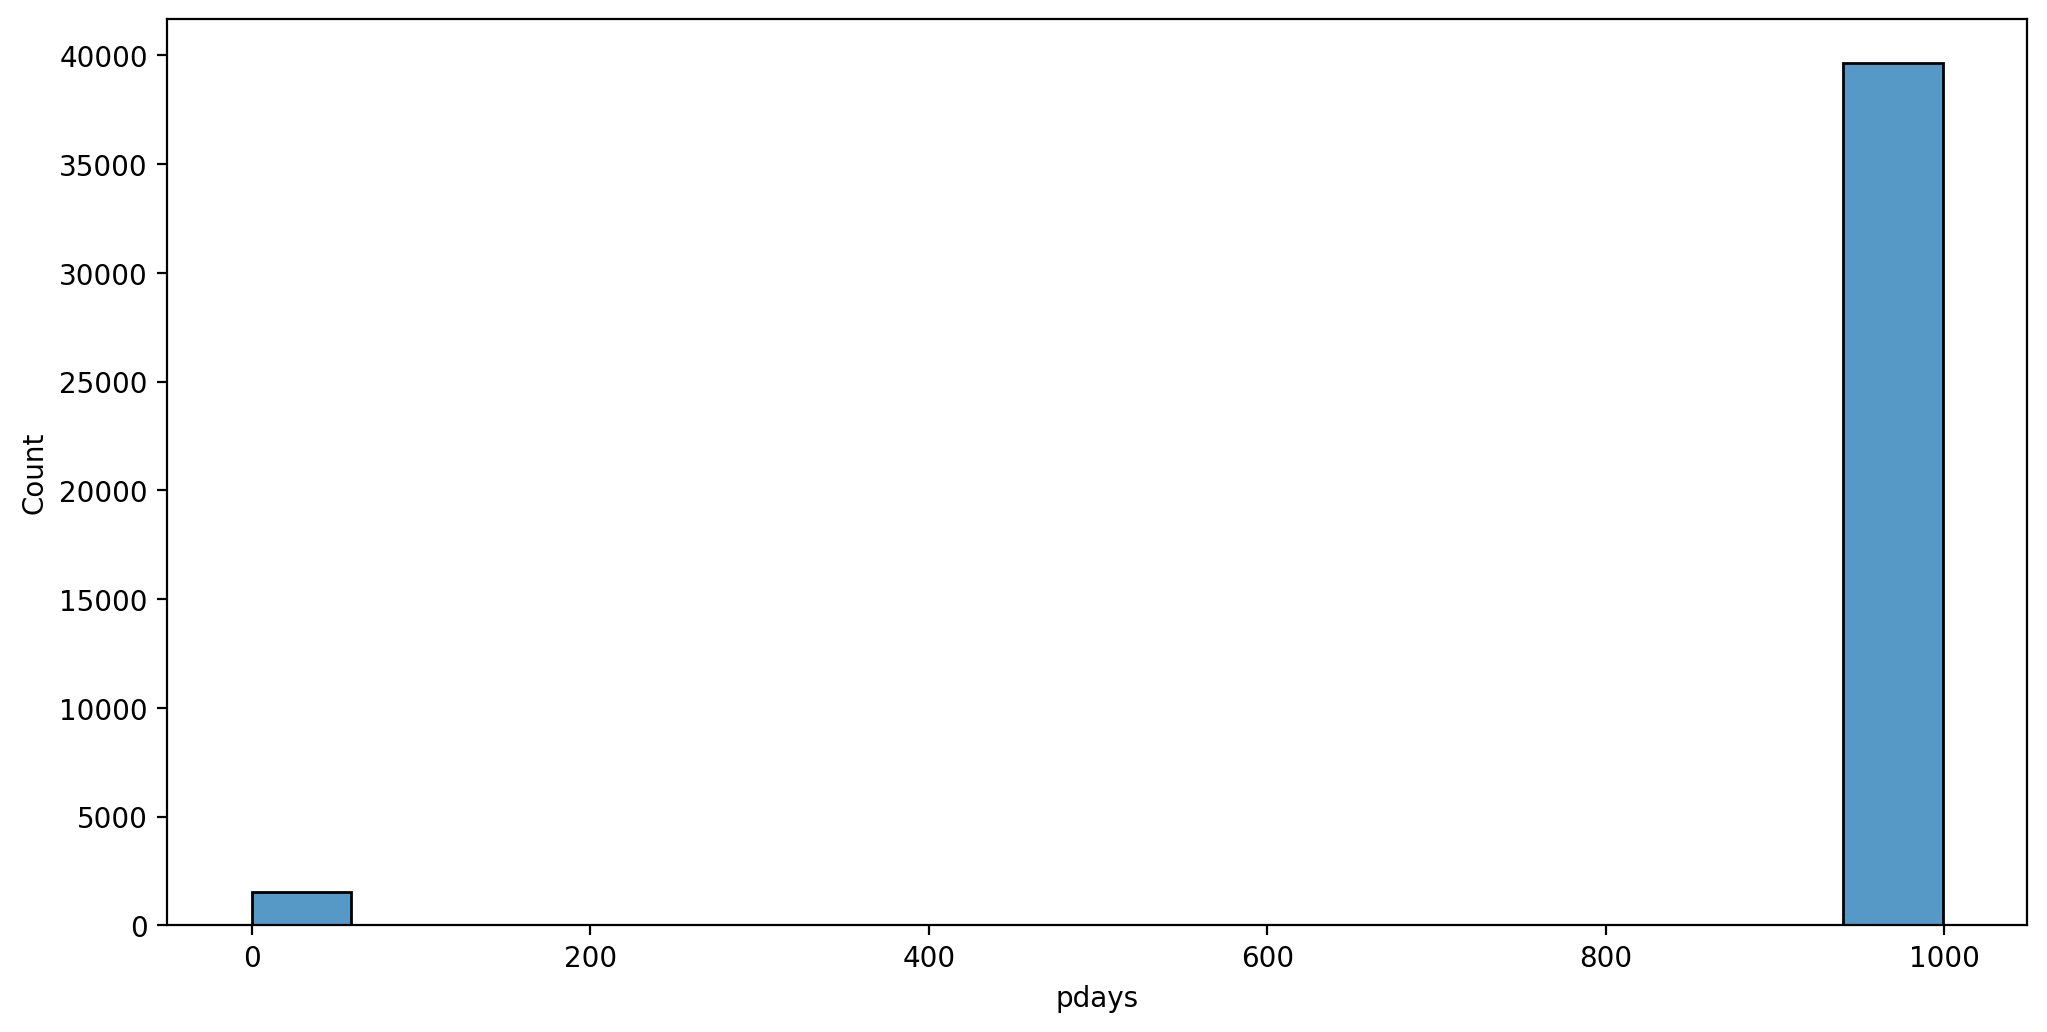

In [33]:
# plot showing days in the dataset
# pdays = 999 means they are not contacted once for the promotions.

plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='pdays')

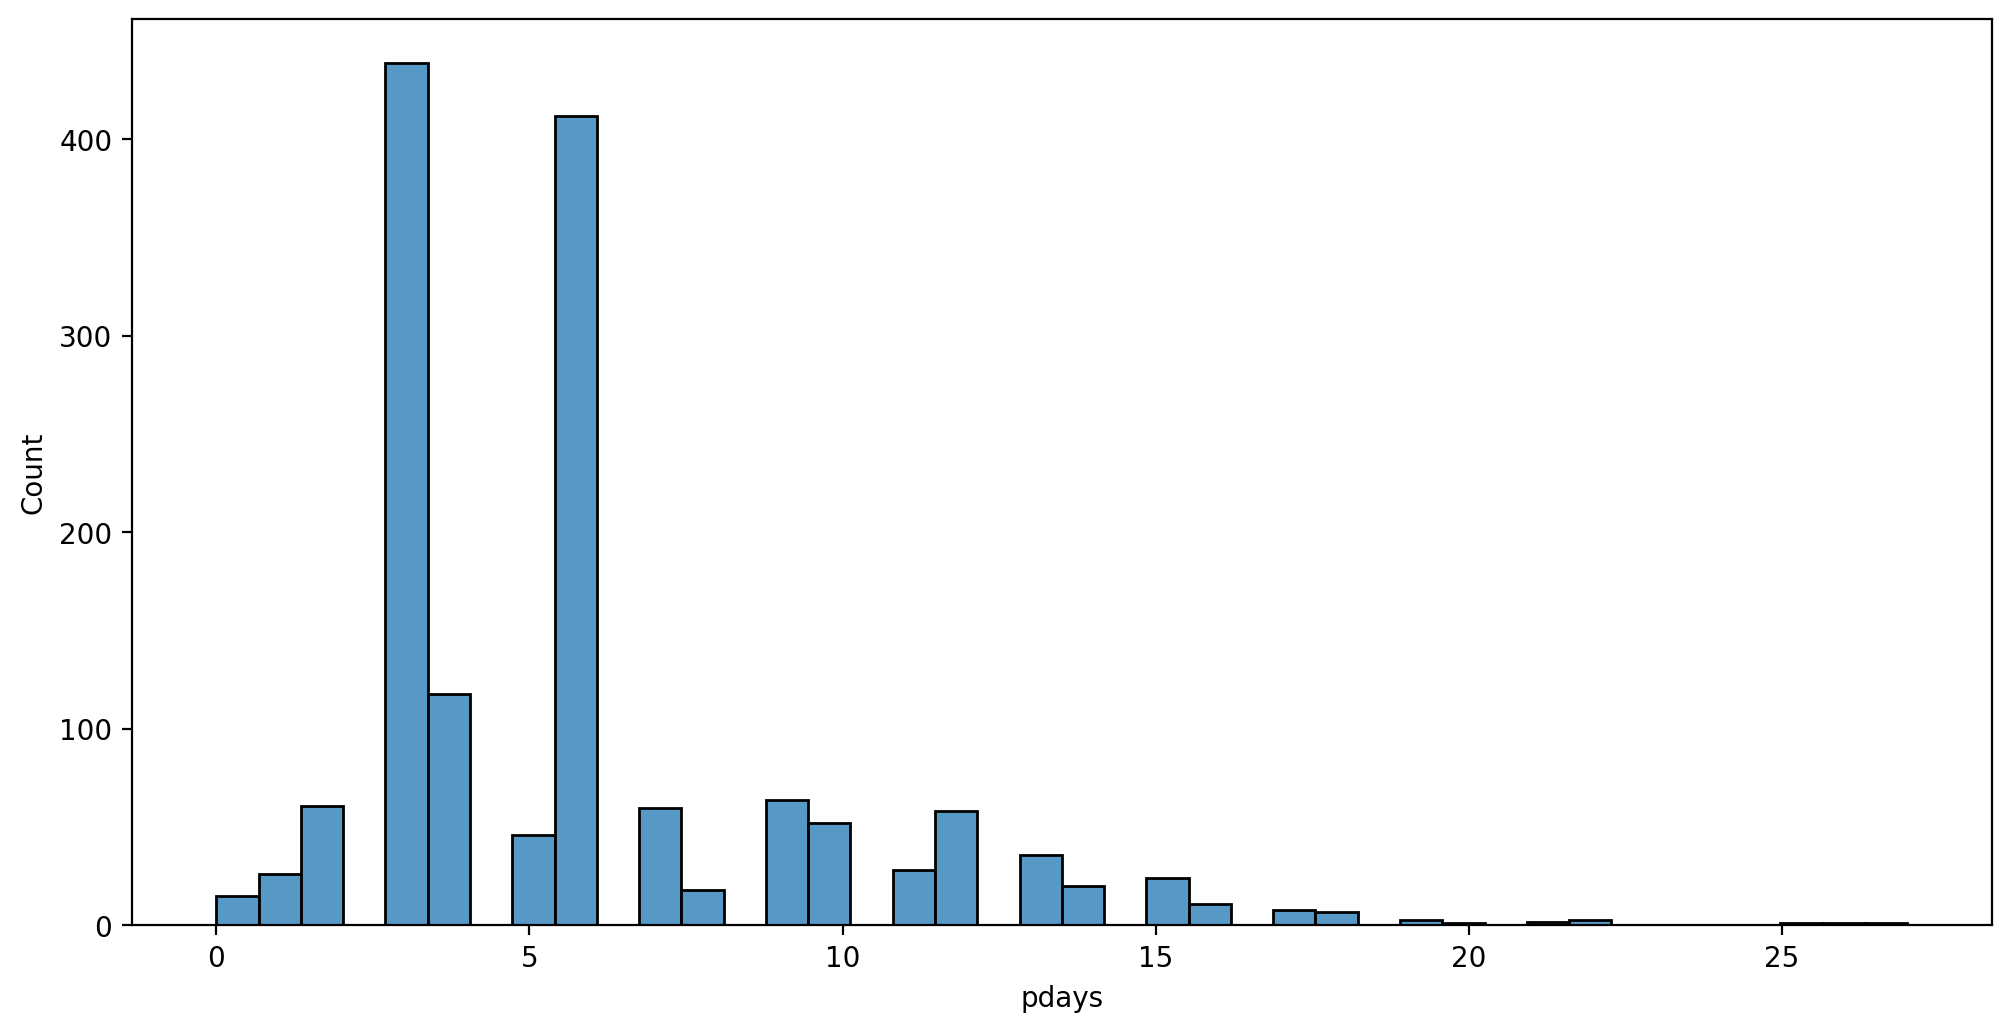

In [34]:
# The above graphs seems confusing, we can elimate the value 999 from the DS since they are not contacted once.

plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df[df['pdays'] != 999], x='pdays', bins= 40)

In [35]:
# Contacts in the Dataset

df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

(0.0, 1000.0)

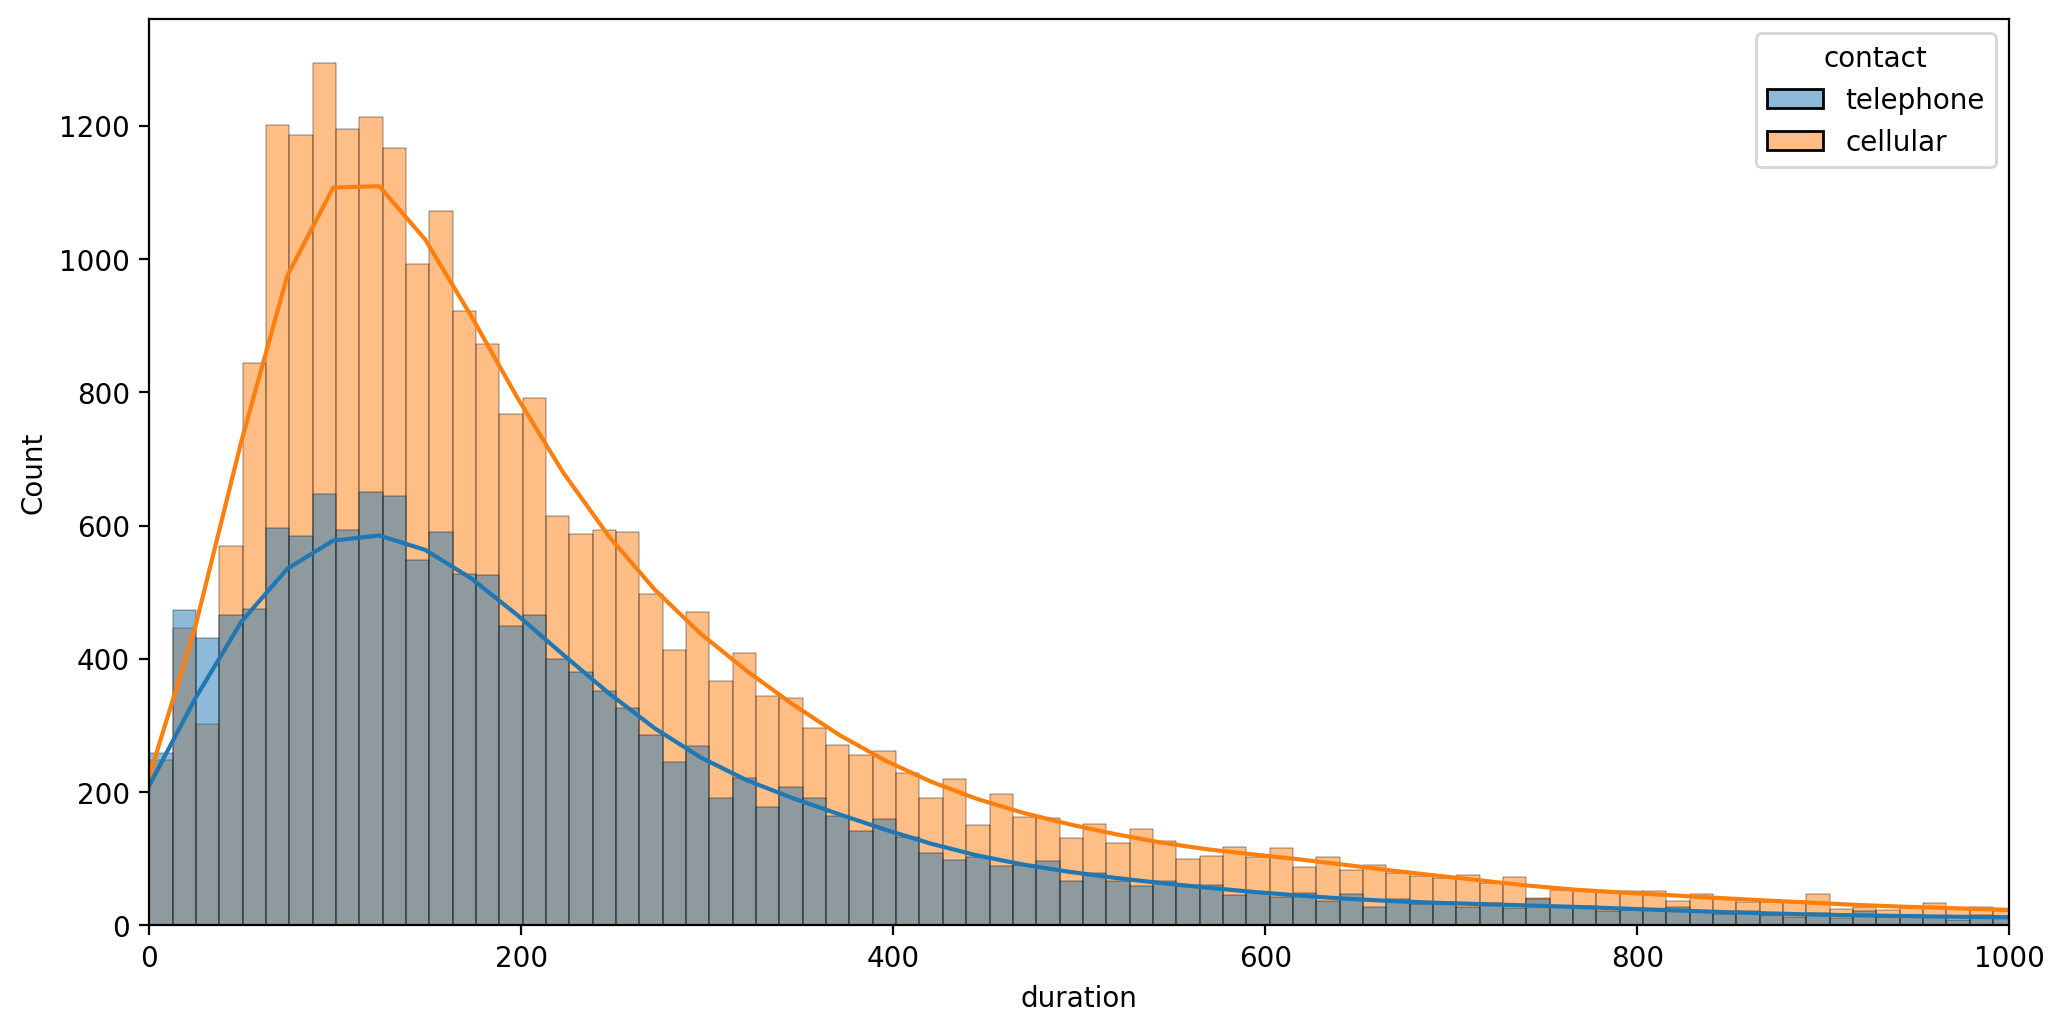

In [36]:
# Relation between contact and duration
# this shows how much time the bank representative have spoken to customer regarding promotion

plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='duration', kde='True', hue='contact')
plt.xlim(0,1000)

Plot shows that when contact through cellular network the official have spend more time in explaining the offers to the customers

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

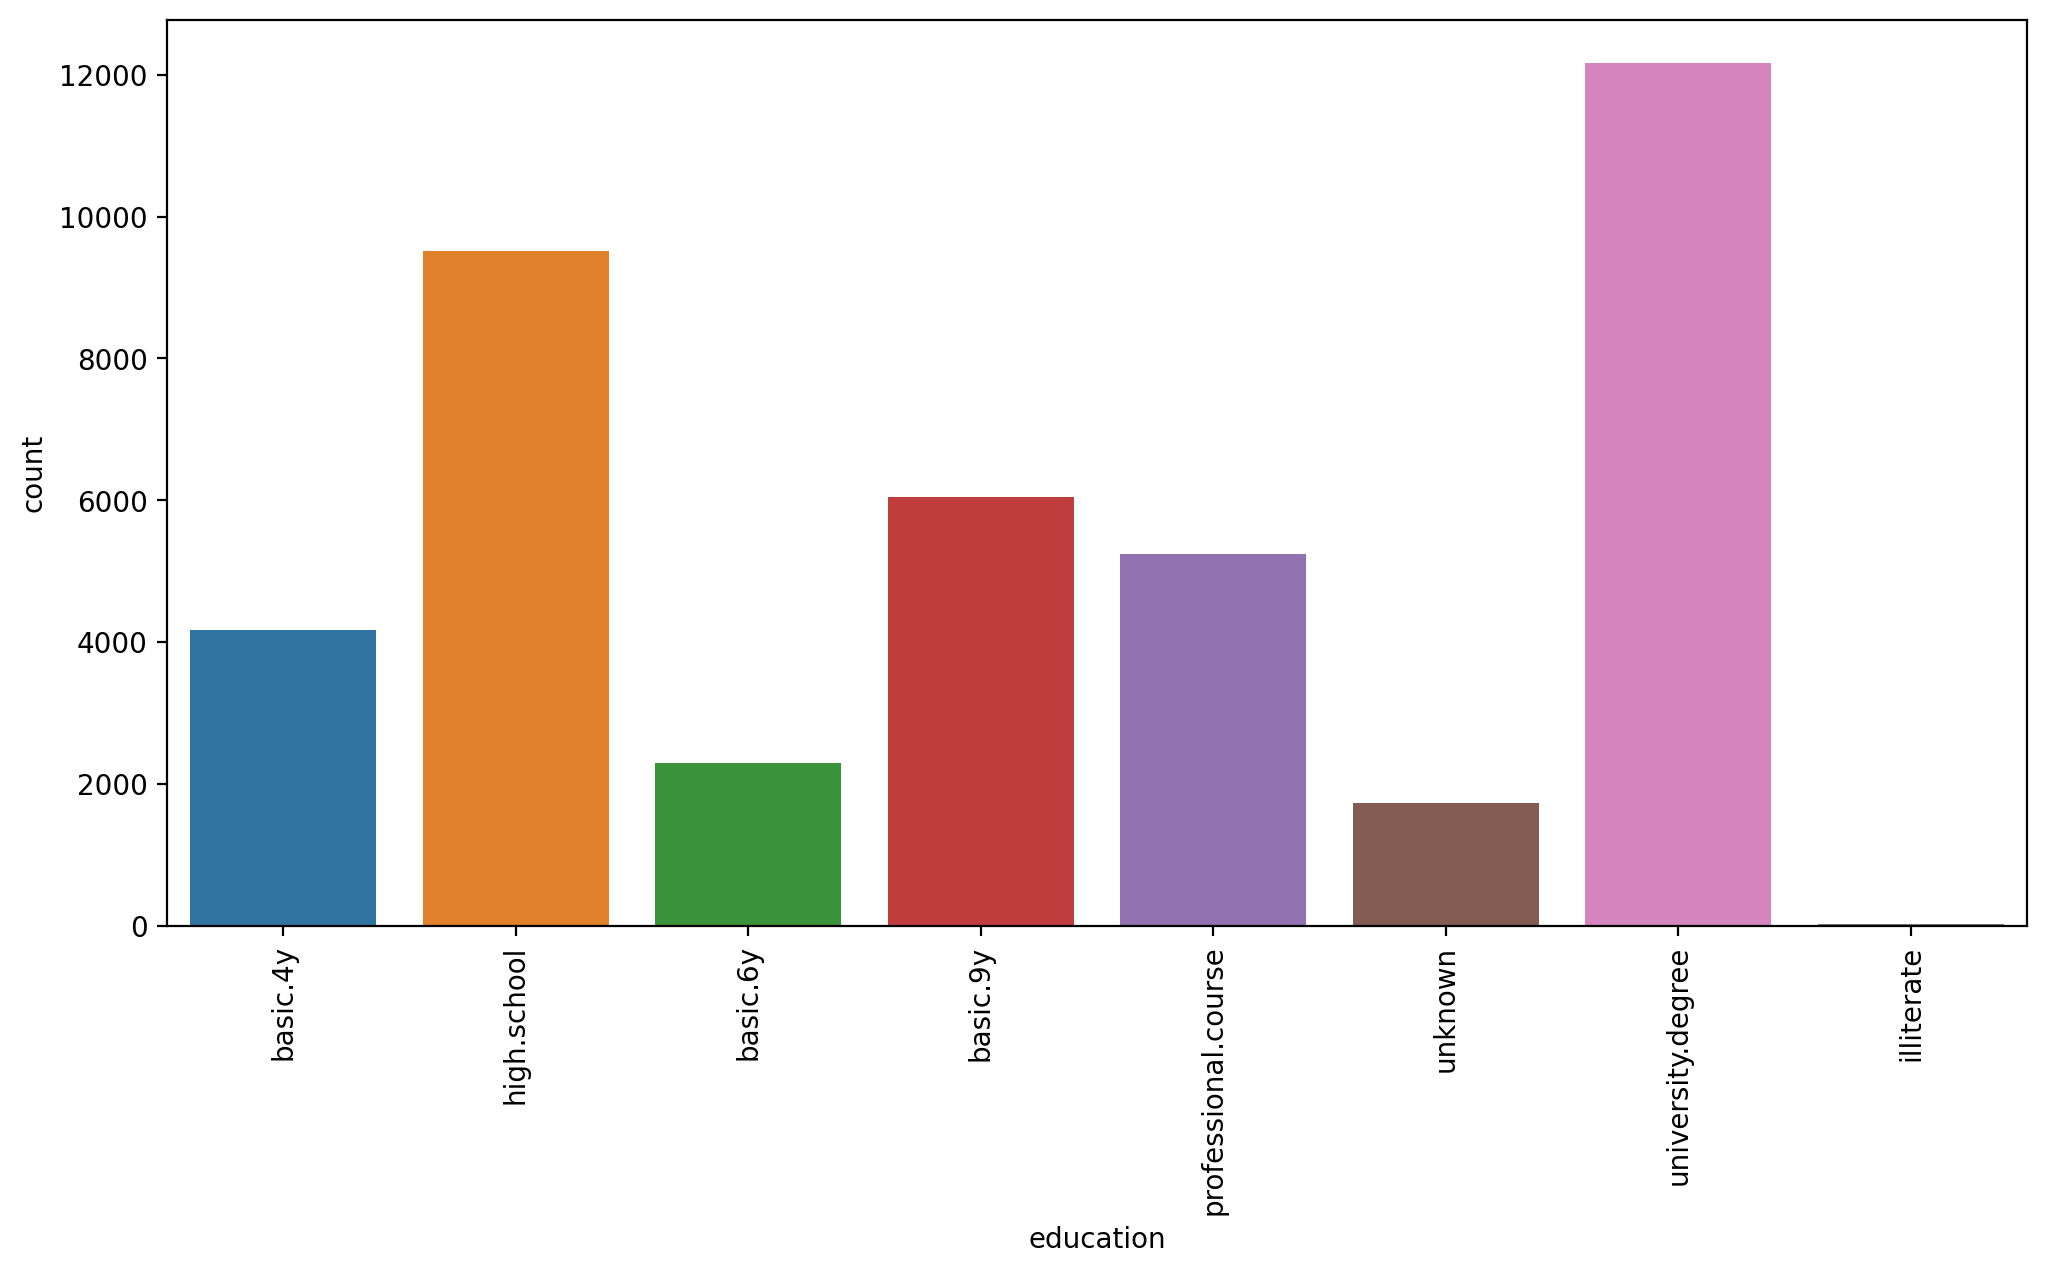

In [37]:
# plot for education

plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x='education')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

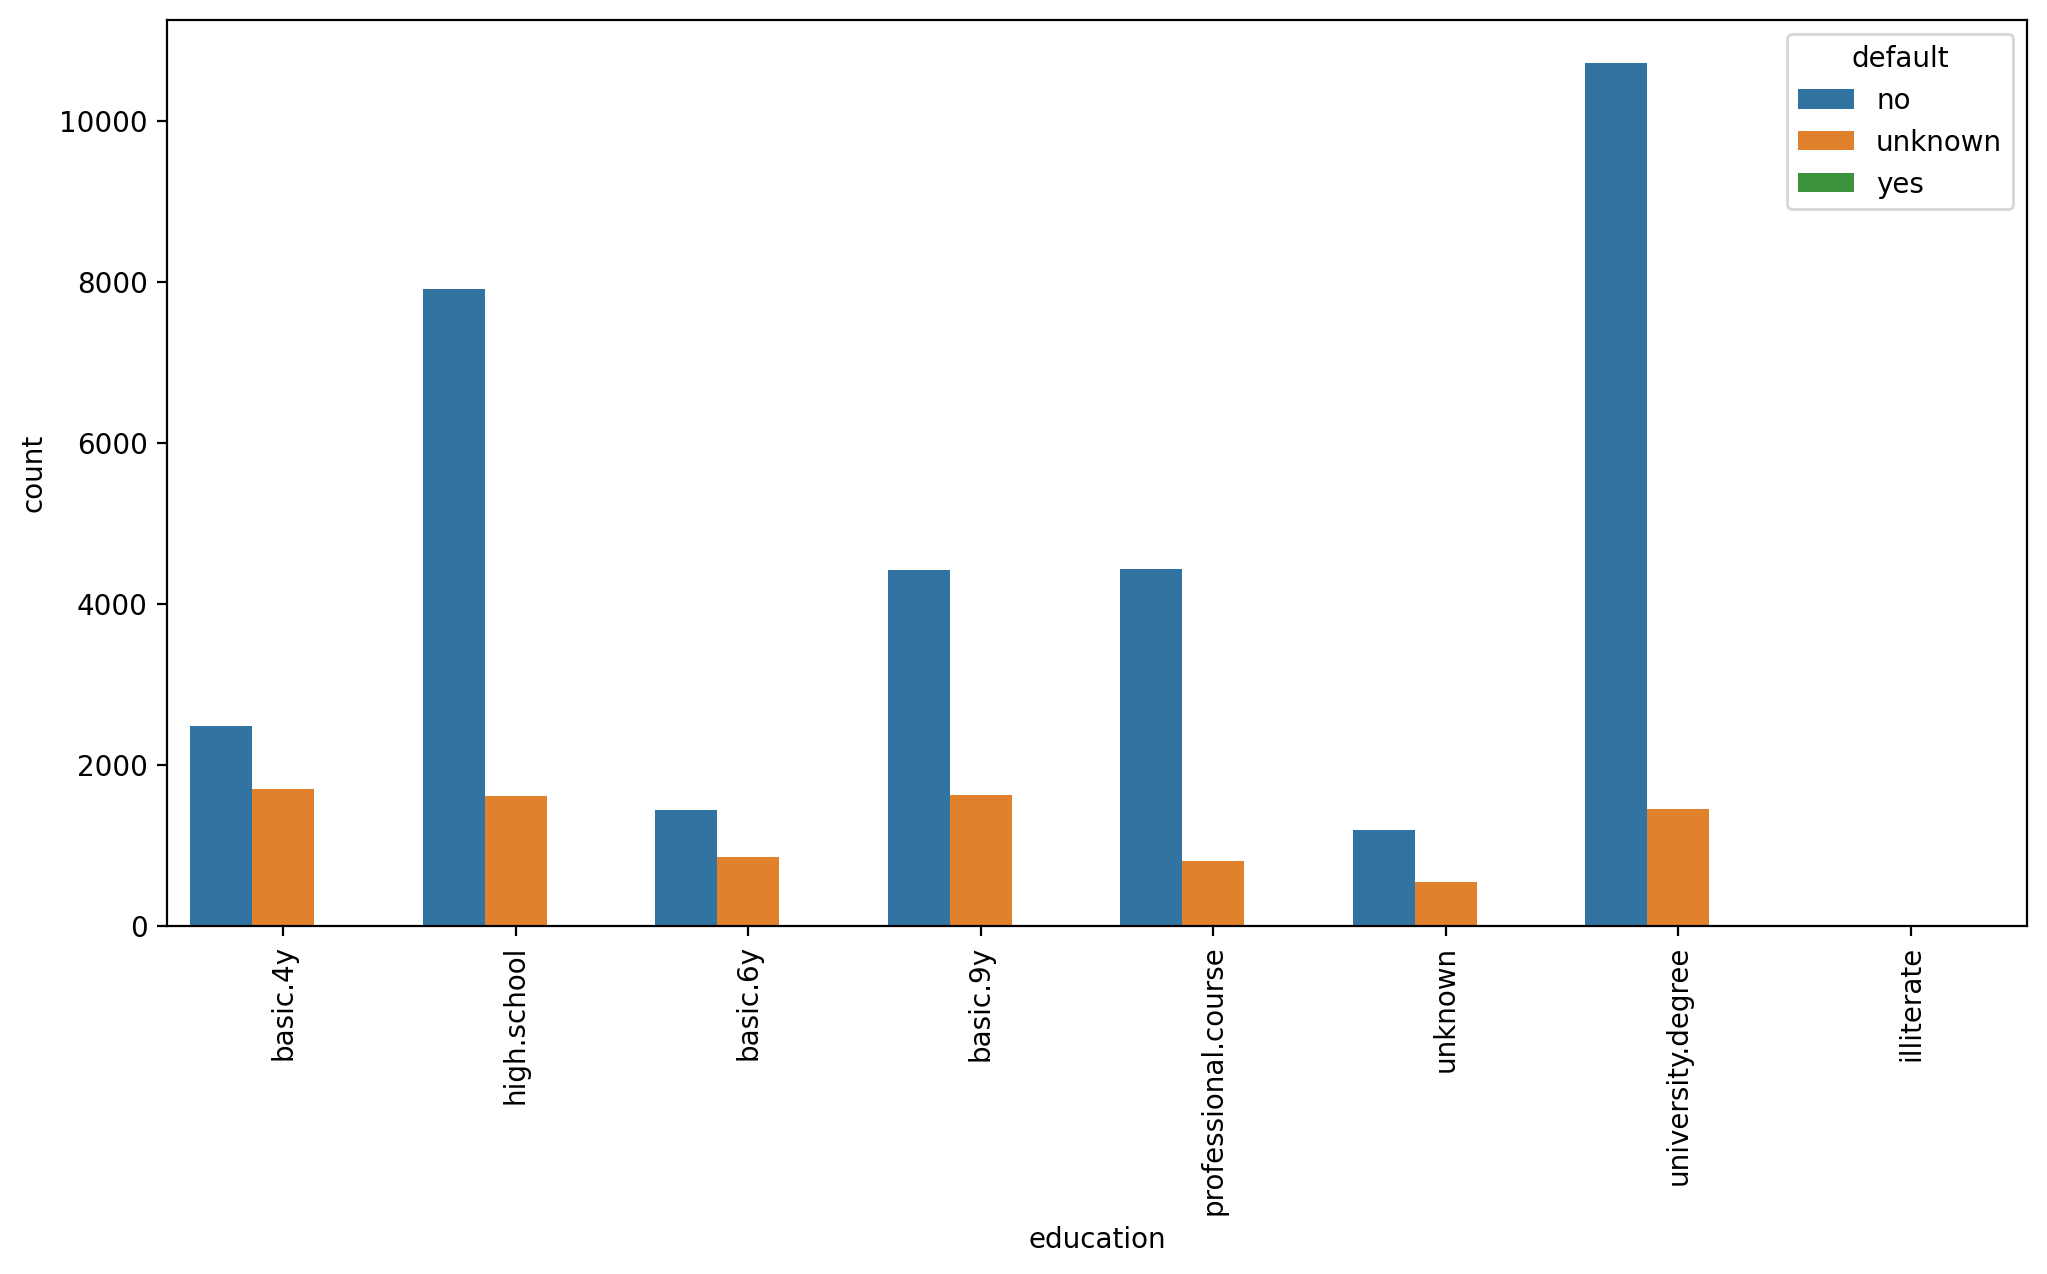

In [38]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x='education', hue='default')
plt.xticks(rotation=90)

<Figure size 2400x1200 with 0 Axes>

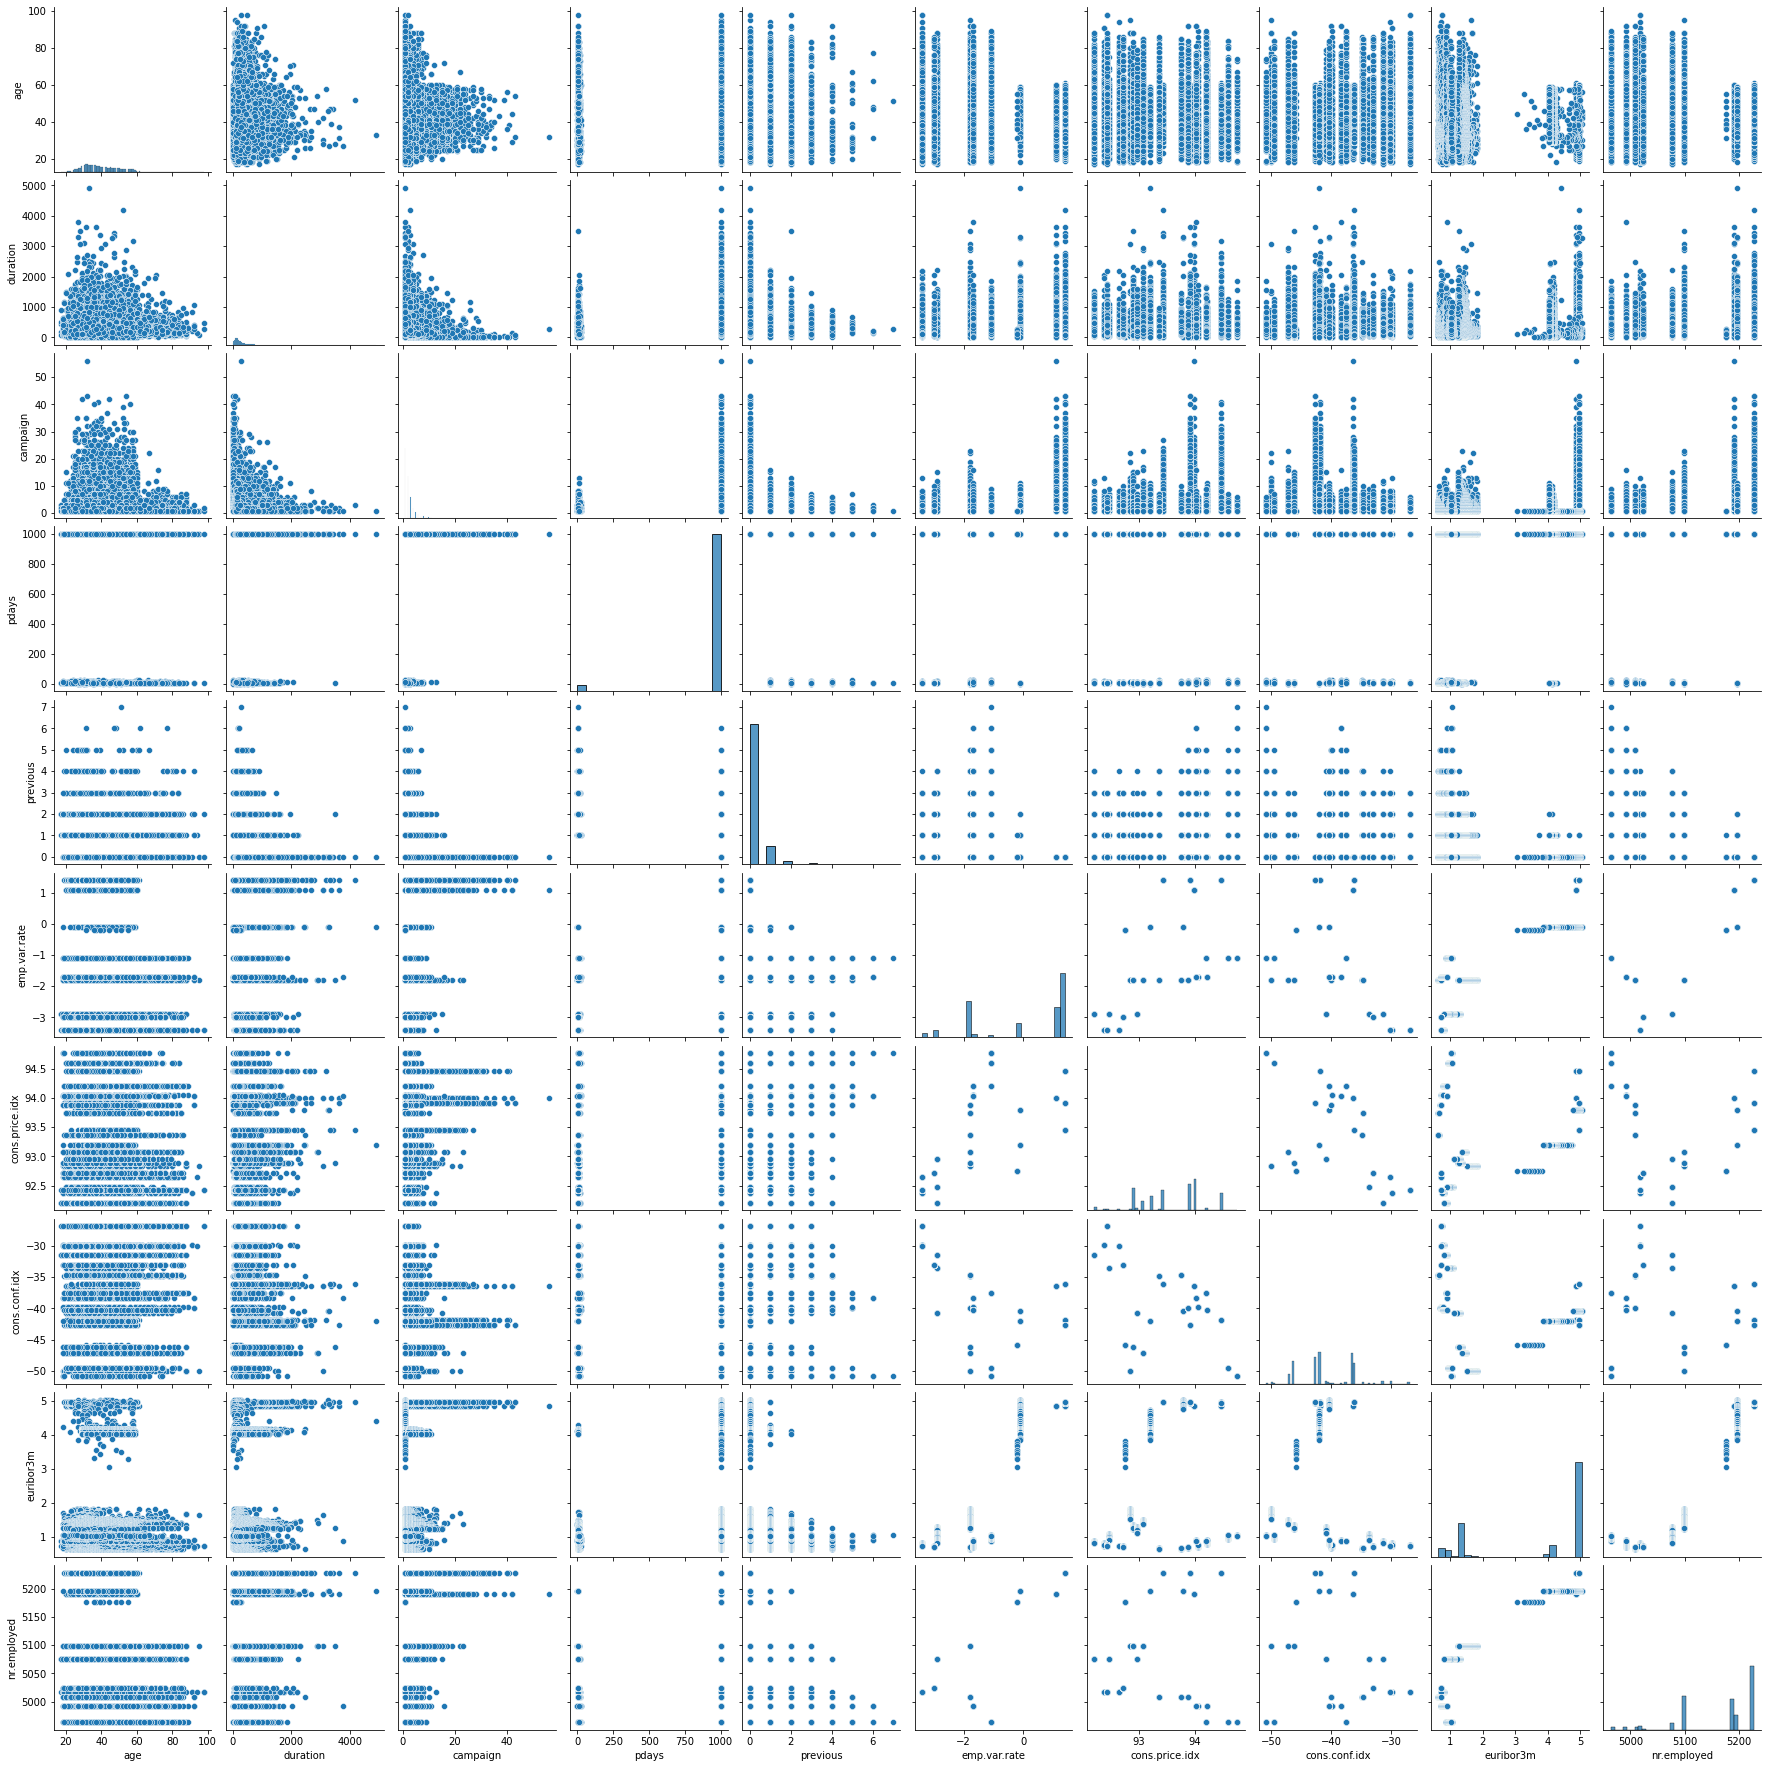

In [39]:
plt.figure(figsize=(12,6), dpi=200)
sns.pairplot(data=df)

### Preprocessing Data

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [41]:
from sklearn.preprocessing import LabelEncoder

In [45]:
df1 = df
encoder = LabelEncoder()
df1['job'] = encoder.fit_transform(df1['job'] )
df1['marital'] = encoder.fit_transform(df1['marital'] )
df1['education'] = encoder.fit_transform(df1['education'] )
df1['default'] = encoder.fit_transform(df1['default'] )
df1['housing'] = encoder.fit_transform(df1['housing'] )
df1['loan'] = encoder.fit_transform(df1['loan'] )
df1['contact'] = encoder.fit_transform(df1['contact'] )
df1['month'] = encoder.fit_transform(df1['month'] )
df1['day_of_week'] = encoder.fit_transform(df1['day_of_week'] )
df1['poutcome'] = encoder.fit_transform(df1['poutcome'] )
df1['subscribed'] = encoder.fit_transform(df1['subscribed'] )
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [47]:
df2 = df
df2 = pd.get_dummies(df2)
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### Scaling of data

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scalar = StandardScaler()
scaled_X1 = scalar.fit_transform(df1)
scaled_X2 = scalar.fit_transform(df2)

### Clustering model creation and execution

In [50]:
from sklearn.cluster import KMeans

In [51]:
model = KMeans(n_clusters=2)

In [52]:
Cluster_label_1 = model.fit_predict(scaled_X1)
Cluster_label_2 = model.fit_predict(scaled_X2)

In [54]:
df1['Cluster'] = Cluster_label_1
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,Cluster
0,56,3,1,0,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
1,57,7,1,3,1,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
2,37,7,1,3,0,2,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
3,40,0,1,1,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
4,56,7,1,3,0,0,2,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1


In [55]:
df2['Cluster'] = Cluster_label_2
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,Cluster
0,56,3,1,0,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,7,1,3,1,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,7,1,3,0,2,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,0,1,1,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,7,1,3,0,0,2,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0


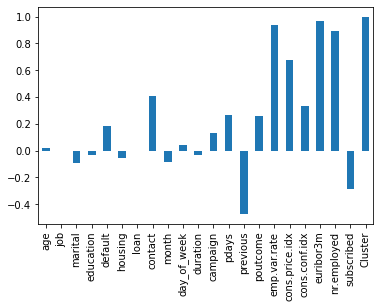

In [59]:
df1.corr()['Cluster'].plot(kind='bar')

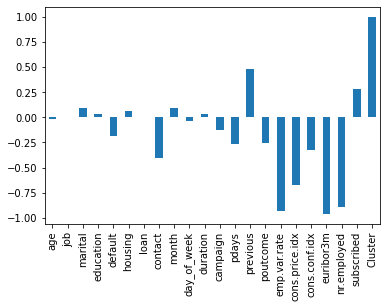

In [60]:
df2.corr()['Cluster'].plot(kind='bar')